In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class LinearRegression(d2l.Module): #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [3]:
@d2l.add_to_class(LinearRegression) #@save
def forward(self, X):
    return self.net(X)

In [4]:
@d2l.add_to_class(LinearRegression) #@save
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

In [5]:
@d2l.add_to_class(LinearRegression) #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

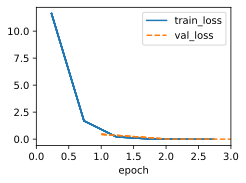

In [6]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [7]:
@d2l.add_to_class(LinearRegression) #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)

w, b = model.get_w_b()

In [8]:
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0016, -0.0075])
error in estimating b: tensor([0.0106])


In [9]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd
    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

In [10]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

L2 norm of w: 1.2866287231445312


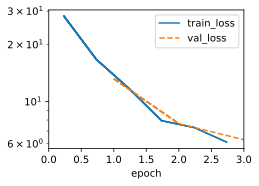

In [11]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)
print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))